# Digits MNIST Multiclass image classification

With the Multi Layer Perceptron made by Abel Garcia

## EDA (exploratory data analysis) and preprocessing

This dataset contains 700 images of digits and 10 different classes.

In [2]:
from MLP_Abel import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,  precision_score, recall_score, roc_curve,roc_auc_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

import math as math

from timeit import default_timer as timer

%matplotlib notebook

Load the datasets:

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('../csv/digits mnist/data.csv')

y = dataset['label'].values

X = dataset.drop("label", axis="columns").to_numpy()

print(dataset.values.shape)

dataset.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Showing images

In [3]:
def showImg(i, label, imgset):
    size = int(math.sqrt(imgset[i].shape[0]))
    sample = np.reshape(imgset[i], (size,size))
    print(sample.shape)
    plt.figure()
    plt.title(label)
    plt.imshow(sample, 'gray')

### Data normalization

In [4]:
X = (X - X.mean()) / X.std()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [5]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

dicClases = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

(21000, 784) (21000, 1)
(21000, 784) (21000, 1)


(28, 28)


<IPython.core.display.Javascript object>


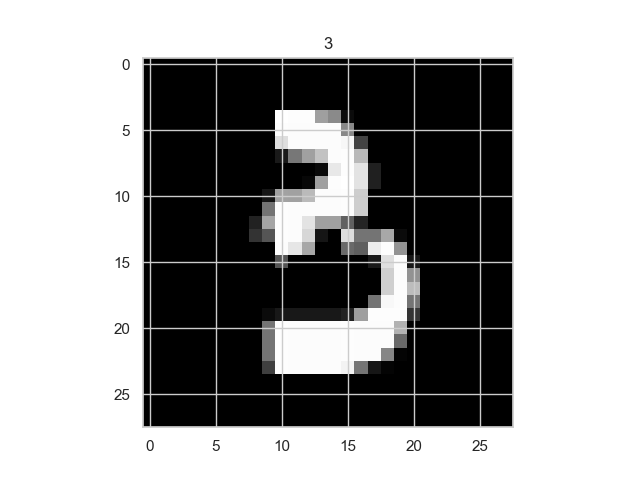

(28, 28)


<IPython.core.display.Javascript object>


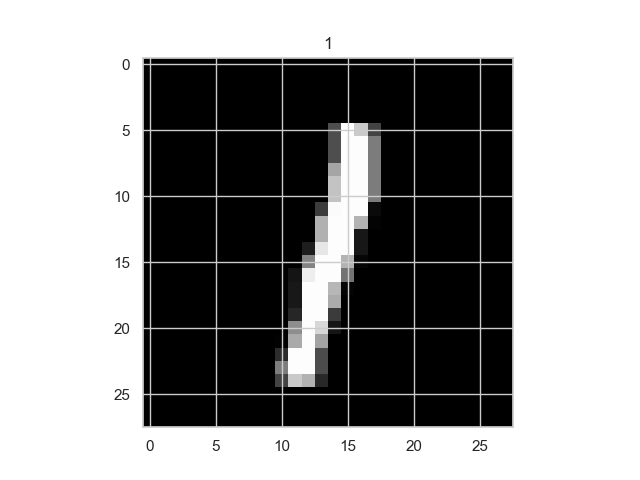

In [6]:
showImg(8, dicClases[y_train[8, 0]], x_train)
showImg(9, dicClases[y_train[9, 0]], x_train)

### Countplot:

Number of images of each class.

<IPython.core.display.Javascript object>


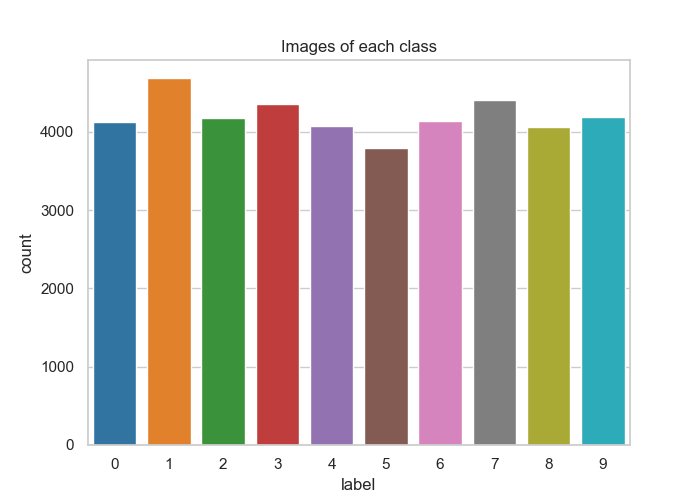

In [7]:
plt.figure(figsize=(7,5))
plt.title('Images of each class')
sns.countplot(x='label', data=dataset)

# Classification

Preparing y_train with FC output shape:

In [8]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_train_multiclass = np.zeros((y_train.shape[0], len(dicClases.items())), dtype=int)

print(y_train_multiclass.shape)

for i, yv in enumerate(y_train):
    y_train_multiclass[i][yv] = 1
    
print(y_train[0:2])

print(y_train_multiclass[0:2])

print(y_train_multiclass.shape)

(21000, 10)
[[8]
 [0]]
[[0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]]
(21000, 10)


Train the model:

In [26]:
trainModel = True
exportModel = False

mpath = 'exportedModels/'
mfilename = 'digitsMNIST'

if trainModel:
    
    clf = MLP_Abel(hidden=[25], nEpochs=30, learningRate=0.3, debugLevel=2,
                   rangeRandomWeight=None, softmax=False, activationFunction='relu',
                   verbose=True, showLogs=False, batch_size=1, pre_norm=True)

    start = timer()
    clf.fit(x_train, y_train_multiclass)
    end = timer()
    print('Time in seconds: ', end - start)
    
    if exportModel:
        clf.exportModel(mpath, mfilename)
    
else:
    
    clf = MLP_Abel()
    clf.importModel(mpath, mfilename)

Training started with 21000 samples

Epoch 1/30 completed
--- Epoch loss: 0.0097

Epoch 2/30 completed
--- Epoch loss: 0.006

Epoch 3/30 completed
--- Epoch loss: 0.005

Epoch 4/30 completed
--- Epoch loss: 0.0045

Epoch 5/30 completed
--- Epoch loss: 0.0042

Epoch 6/30 completed
--- Epoch loss: 0.0039

Epoch 7/30 completed
--- Epoch loss: 0.0036

Epoch 8/30 completed
--- Epoch loss: 0.0034

Epoch 9/30 completed
--- Epoch loss: 0.0033

Epoch 10/30 completed
--- Epoch loss: 0.0031

Epoch 11/30 completed
--- Epoch loss: 0.003

Epoch 12/30 completed
--- Epoch loss: 0.0029

Epoch 13/30 completed
--- Epoch loss: 0.0028

Epoch 14/30 completed
--- Epoch loss: 0.0027

Epoch 15/30 completed
--- Epoch loss: 0.0026

Epoch 16/30 completed
--- Epoch loss: 0.0026

Epoch 17/30 completed
--- Epoch loss: 0.0025

Epoch 18/30 completed
--- Epoch loss: 0.0024

Epoch 19/30 completed
--- Epoch loss: 0.0023

Epoch 20/30 completed
--- Epoch loss: 0.0023

Epoch 21/30 completed
--- Epoch loss: 0.0022

Epoch 22/

Predict probabilities of test dataset:

In [27]:
probabs = clf.predict_proba(x_test)

In [28]:
print(probabs.shape)
probabs_results = np.argmax(probabs, axis=1)

(21000, 10)


## Confusion matrix of classification

<IPython.core.display.Javascript object>


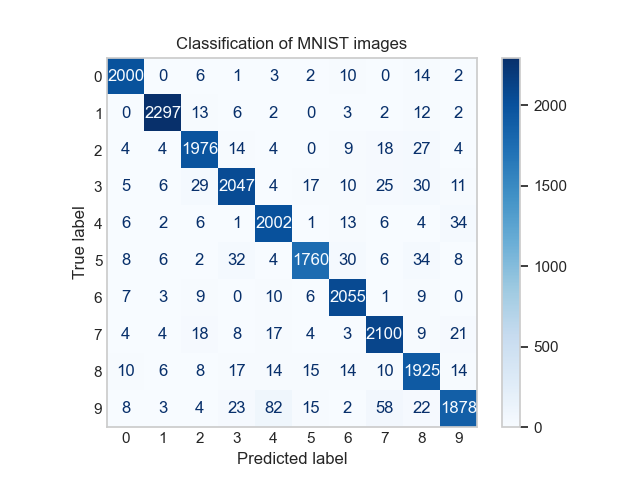

In [29]:
cmMT = confusion_matrix(y_test, probabs_results, normalize=None)
cmd = ConfusionMatrixDisplay(cmMT, display_labels=dicClases.values())
cmd = cmd.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.title("Classification of MNIST images")
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.show()

## Accuracy score

In [37]:
acc = accuracy_score(y_test, probabs_results)
print('Accuracy:', round(acc, 3), '\n')

Accuracy: 0.954 



## Plots

<IPython.core.display.Javascript object>


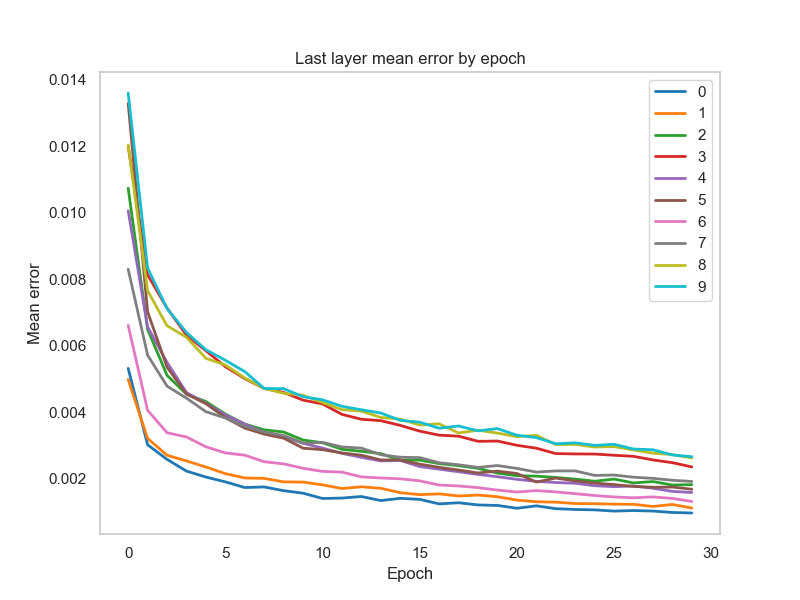

In [38]:
clf.plot_mean_error_last_layer(dicClases.values(), byClass=True)

<IPython.core.display.Javascript object>


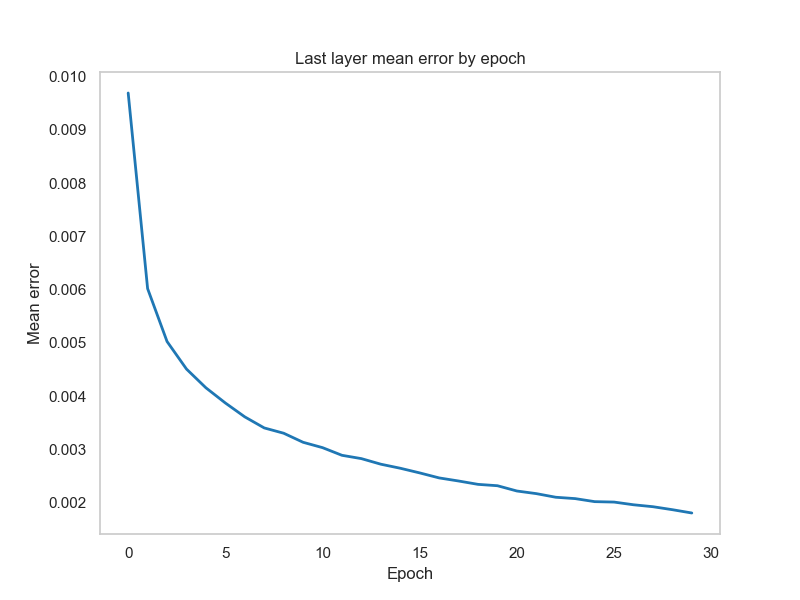

In [39]:
clf.plot_mean_error_last_layer(dicClases.values(), byClass=False)

# Comparative with sklearn MLP

Time in seconds:  92.96828679999999
(21000, 10)
[3 7 1]


<IPython.core.display.Javascript object>


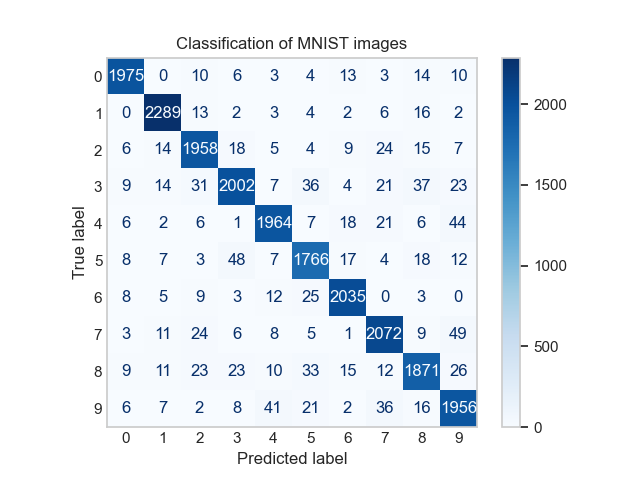

In [44]:
from sklearn.neural_network import MLPClassifier
clf_L = MLPClassifier(max_iter=1000, hidden_layer_sizes=[25])

start = timer()
clf_L.fit(x_train, y_train_multiclass)
end = timer()
print('Time in seconds: ', end - start)

probabs_L = clf_L.predict_proba(x_test)

print(probabs_L.shape)
probabs_results_L = np.argmax(probabs_L, axis=1)
print(probabs_results_L[0:3])

cmMT = confusion_matrix(y_test, probabs_results_L, normalize=None)
cmd = ConfusionMatrixDisplay(cmMT, display_labels=dicClases.values())
cmd = cmd.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.title("Classification of MNIST images")
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.show()

In [45]:
acc_L = accuracy_score(y_test, probabs_results_L)
print('Accuracy:', round(acc_L, 3), '\n')

Accuracy: 0.947 



<IPython.core.display.Javascript object>


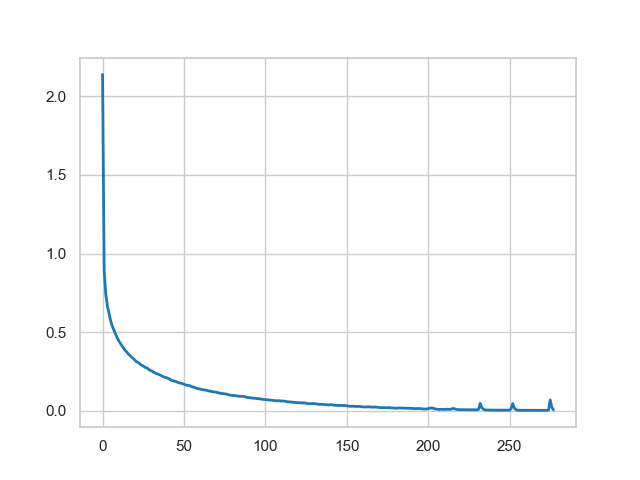

In [46]:
plt.figure()
plt.plot(clf_L.loss_curve_)
plt.show()